In [26]:
# Import libraries.
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras import utils
from tensorflow.image import rgb_to_grayscale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pandas as pd

In [27]:
# Load the data from the CSV.
df = pd.read_csv("data.csv")

array([[<AxesSubplot:title={'center':'emotion'}>]], dtype=object)

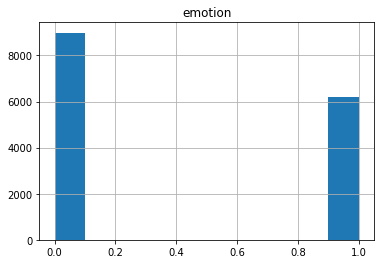

In [28]:
# Show a histogram of the data distribution for each label.
df.hist()

In [31]:
data = []
labels = []

for i, row in df.iterrows():
    # Each row contains two columns: "label" and "pixels".
    # "pixels" represents an np.array representation of the image.
    label, pixels = row
    
    # Split each pixel, which is separated by a space (" ").
    x = pixels.split(" ")
    
    # Convert the array to an np.array.
    x = np.array(x)

    # Append the image to the dataset.
    data.append(x)
    
    # Append the label to the labels.
    labels.append(label)
    
    # label at index i, represents the image at index i.
    
# Convert the image to float 32.
data = np.array(data, dtype="float32")

# Reshape the image to be 48x48 with only one channel.
# Only one channel because it is a blank and white picture.
data = data.reshape(data.shape[0], 48, 48, 1)

# Normalize the image, convert the numbers to range from 0 to 1.
data /= 255

In [32]:
# There are only two labels, "smile" and "neutral" or 0 and 1.
assert len(np.unique(labels)) == 2

In [33]:
# Convert the labels to categorical, meaning [1, 0] and [0, 1].
labels = utils.np_utils.to_categorical(labels)

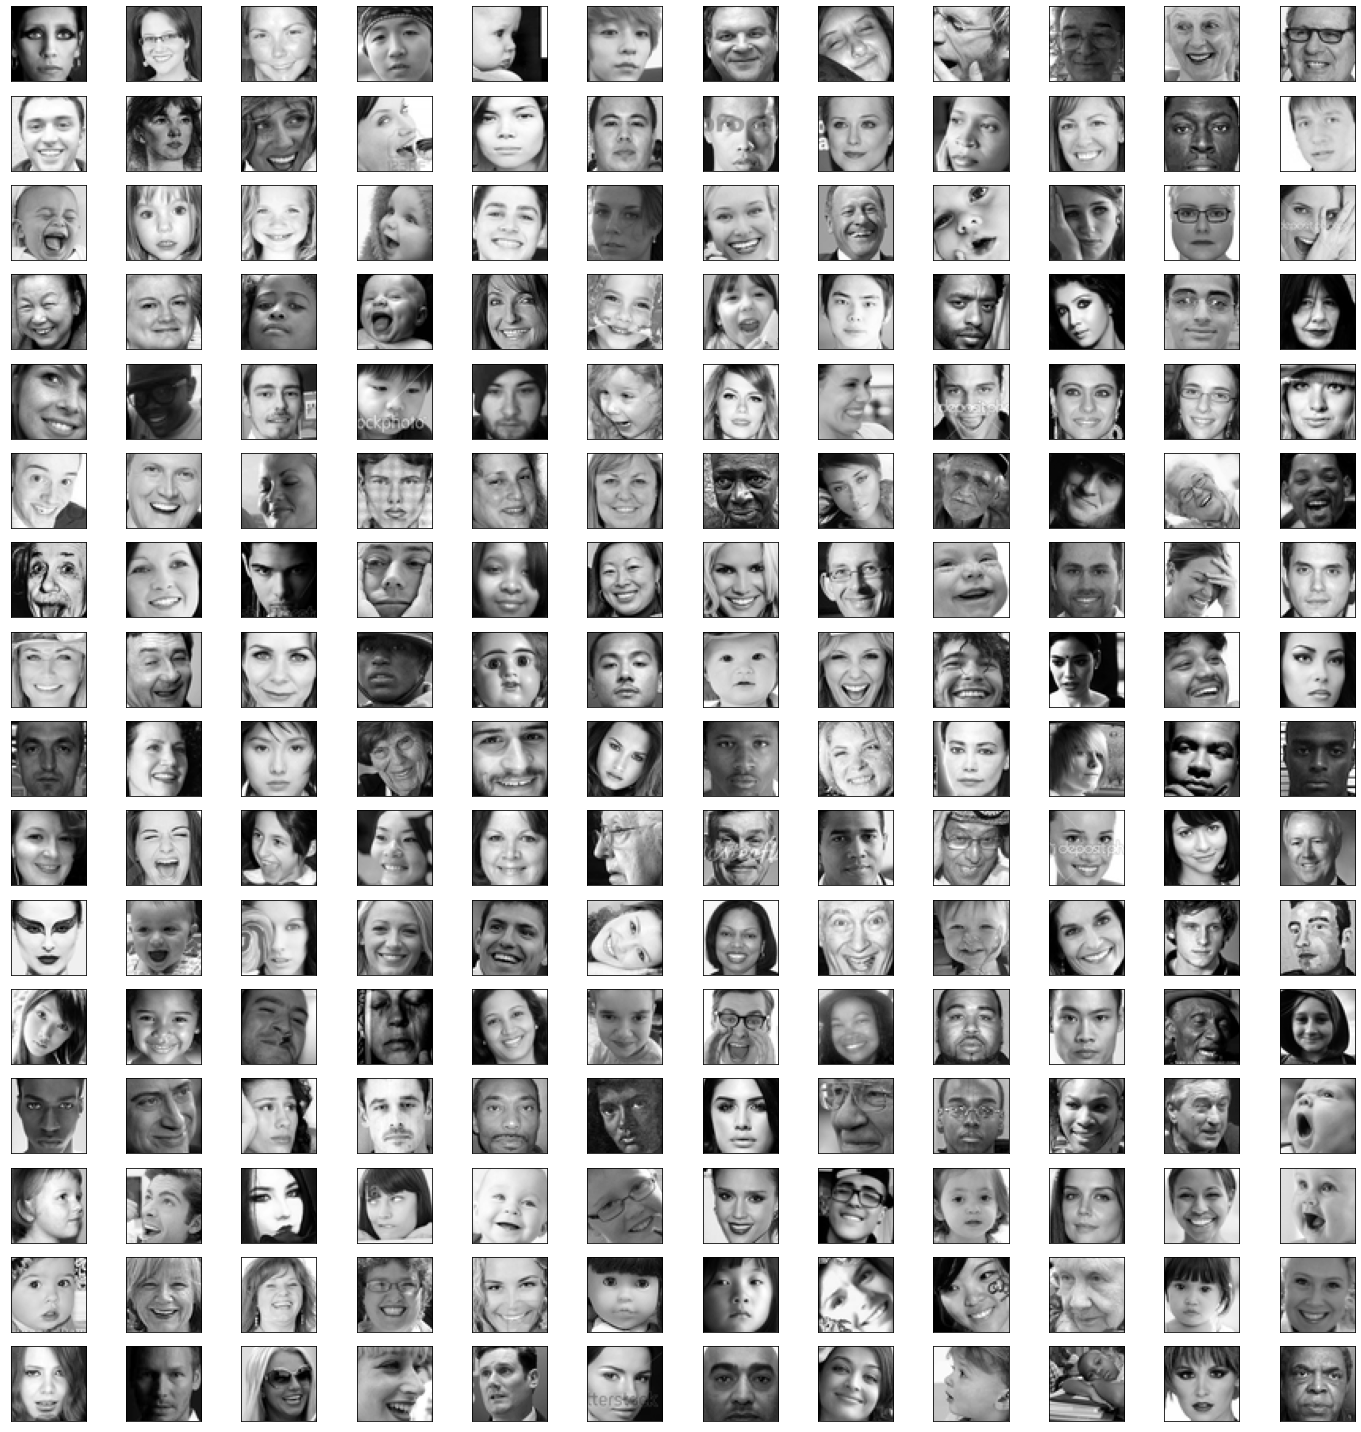

In [23]:
def overview(start: int , end: int, data):
    """
    Plots small images from start to end.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in range(start, end + 1):
        input_img = data[i:(i + 1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

# Show me an overview of the first 191 images.
overview(0, 191, data)

In [24]:
# Split data into testing and training, 75% training and 25% validation.
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

In [25]:
# Model layer definition.
modelN = keras.Sequential()
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(MaxPooling2D(pool_size=(2, 2)))

modelN.add(Flatten())
modelN.add(Dense(64, activation='relu'))
modelN.add(Dense(64, activation='relu'))
modelN.add(Dense(2, activation='softmax'))

modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Train model using train data and validate using validation_data.
history = modelN.fit(train_x, train_y, epochs=10, batch_size=150, validation_data=(test_x, test_y), shuffle=True)

Epoch 1/10
76/76 [==============================] - 101s 1s/step - loss: 0.3067 - accuracy: 0.8736 - val_loss: 0.3240 - val_accuracy: 0.8604
Epoch 2/10
76/76 [==============================] - 103s 1s/step - loss: 0.2928 - accuracy: 0.8778 - val_loss: 0.3252 - val_accuracy: 0.8607
Epoch 3/10
76/76 [==============================] - 104s 1s/step - loss: 0.2729 - accuracy: 0.8878 - val_loss: 0.3437 - val_accuracy: 0.8641
Epoch 4/10
76/76 [==============================] - 92s 1s/step - loss: 0.2596 - accuracy: 0.8898 - val_loss: 0.3139 - val_accuracy: 0.8688
Epoch 5/10
76/76 [==============================] - 115s 2s/step - loss: 0.2442 - accuracy: 0.8995 - val_loss: 0.3198 - val_accuracy: 0.8733
Epoch 6/10
76/76 [==============================] - 8605s 115s/step - loss: 0.2221 - accuracy: 0.9114 - val_loss: 0.3440 - val_accuracy: 0.8599
Epoch 7/10
76/76 [==============================] - 550s 7s/step - loss: 0.2127 - accuracy: 0.9142 - val_loss: 0.3357 - val_accuracy: 0.8665
Epoch 8/10


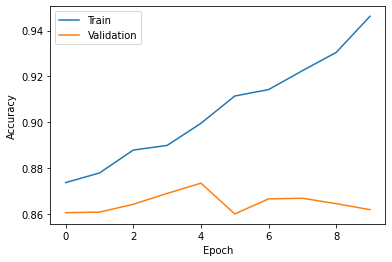

In [28]:
# Display a graph of the epoch history of the model.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
# Run the model on our test data for testing purposes.
predictions = modelN.predict(test_x)

In [30]:
# Compute the predicted and true labels.
y_pred_labels = np.argmax(predictions, axis=1)
y_true_labels = np.argmax(test_y, axis=1)

# Display a confusion matrix.
metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

array([[1941,  306],
       [ 219, 1331]])

In [31]:
# Save the model locally.
modelN.save("smile.model")

INFO:tensorflow:Assets written to: smile.model/assets
